Analyzing Manchester United's Goals and Assists contribution for the on going 2022/2023 season with a vizualizations.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import mslib

Data or CSV is pulled from SportsReference.com 

In [22]:
#read csv 
manU = pd.read_csv('ManU.csv')

Sorting the data frame by goals scored and removing anomalys

In [ ]:
manU = manU.sort_values('Gls', ascending=False)
manU

We can see that we have players "Squad Total" and "Opponent Total" so we'll remove them from the data set  

In [ ]:
manU.drop([34, 35], axis=0, inplace=True)
manU

We can see that Marcus Rashford is the current goal scorer this season. 
We want the player who has contributed most in with goals and assists per 90 minutes. We will sort by
"G+A" which is goals and assists overall this season.  

In [ ]:
manU.sort_values('G+A', ascending=False)

Now we'll pull only the player name and "G+A" columns to condense the data set. 
We're gonna fillter out all the "NaN" and all values that equal to zero. 

In [ ]:
manU1 = manU[['Player','G+A']]
manU1=manU1.dropna()
manU1 = manU1[manU1['G+A'] != 0.00]
manU1

In [ ]:
#Sorts the data set 
manU1 = manU1.sort_values('G+A', ascending=False)
manU1

We can now see which player has contributed more this season in attack which is the Argentine teenager Alejandro Garnacho. Let's cut this data set in half to present the vizualization. We can see that halfway is between "0.33" and "0.38" 

In [19]:
#Filtering out data that is less than 0.35
manU1 = manU1[manU1['G+A'] >= 0.35]
manU1
manU1.to_csv('ManU_GA.csv')

We're going to a create a "Doughnut" chart to show the shared output of the top seven players in Manchester United's attack 

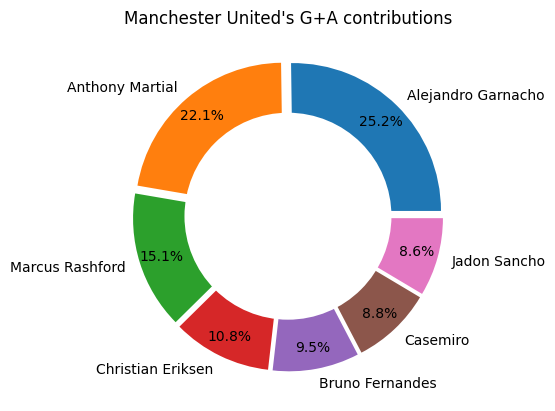

In [12]:
player = manU1['Player']
  
# Setting size in Chart based on 
# given values
num = manU1['G+A']

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
  
plt.pie(num, labels=player,
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title("Manchester United's G+A contributions" )
  
# Displaying Chart
plt.show()

In conclusion we can see that Anthony Martial and Alejandro Garanch contributs almost half of Manchester United's offense 1.12 and 0.98 G+A per 90 minutes with the top seven players. A surprising addition is Casemiro which is the only defesive player included within the top seven. Before we wrap things up let check if these seven players are the players with most minutes on the field. 

In [ ]:
manU2 = manU.sort_values('Min', ascending=False)
manU2

We will filter our data with players who have the attribute FW, MF, or MF/FW (as is the case for Bruno Fernandes). David de Gea and some of the defenders will have the most minutes played so we cannot included them in the following data set. 

In [ ]:
manU2 = manU[['Player','Min', 'Pos']]
manU2=manU2.dropna()
manU2

In [ ]:
#Filter out the positions 
position = ['MF','FW','MF,FW']
manU3 = manU2[manU2['Pos'].isin(position)]

#Replace the comma in the number values and convert them from strings to integers 
manU3['Min']=manU3['Min'].str.replace(',','')
manU3['Min'] = manU3['Min'].astype(int)
manU3 = manU3.sort_values('Min', ascending=False)



In [17]:
#Retreving the top seven players to compare with 
manU3 = manU3.head(7)
manU3
manU3.to_csv('ManU_Minutes.csv')


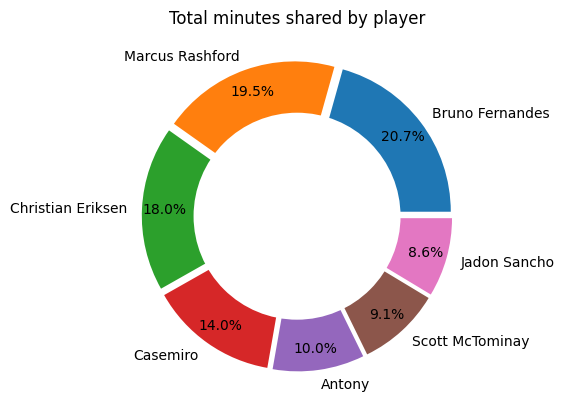

In [20]:

player = manU3['Player']
  
# Setting size in Chart based on 
# given values
num = manU3['Min']

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
  
plt.pie(num, labels=player,
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title("Total minutes shared by player")
  
# Displaying Chart
plt.show()

In conclusion we see that McTominay and Antony enter into the top seven players in minutes played without being in the top seven of contributing to goals and assists. Bruno Fernandes is also the player with the most minutes while only before 4th in the offensive contribution. The biggest exclusion is of Alejandro Garanch who has contributed about a quater to United's offense but is not within the top seven of minutes played. 

Please take into consideration that this is only a surface level analysis. I have not taken into consideration tactics, injuries, opponent, and player seniority. There are many factors that can contribute to player's offensive output and minutes played. I believe that a simple analysis such as this one can help ask question on where minutes played and offensive output can improve. 